<a href="https://colab.research.google.com/github/BohdanShepel2005/Numerical-Methods-of-Programming/blob/main/%D0%9B%D0%91_%E2%84%96_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

f(1.422) = 0.8900329235365888
f(1.451) = 0.8957677002637312


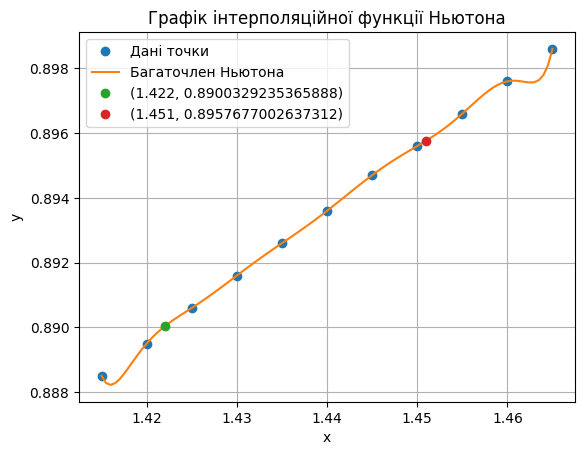

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Задані точки
x = np.array([1.415, 1.420, 1.425, 1.430, 1.435, 1.440, 1.445, 1.450, 1.455, 1.460, 1.465])
y = np.array([0.8885, 0.8895, 0.8906, 0.8916, 0.8926, 0.8936, 0.8947, 0.8956, 0.8966, 0.8976, 0.8986])

# Функція для обчислення багаточленів Ньютона
def newton_interpolation(x, y, x0):
    n = len(x)
    f = np.zeros((n, n))
    f[:, 0] = y
    for j in range(1, n):
        for i in range(n - j):
            f[i, j] = (f[i+1, j-1] - f[i, j-1]) / (x[i+j] - x[i])
    ans = 0
    for j in range(n):
        prod = f[0, j]
        for i in range(j):
            prod *= (x0 - x[i])
        ans += prod
    return ans

# Обчислюємо значення функції в точках x1 = 1.422 та x2 = 1.451
x1 = 1.422
x2 = 1.451
y1 = newton_interpolation(x, y, x1)
y2 = newton_interpolation(x, y, x2)
print(f"f({x1}) = {y1}")
print(f"f({x2}) = {y2}")

# Будуємо графік інтерполяційної функції
xx = np.linspace(np.min(x), np.max(x), 100)
yy = np.zeros_like(xx)
for i in range(len(xx)):
    yy[i] = newton_interpolation(x, y, xx[i])

plt.plot(x, y, 'o', label='Дані точки')
plt.plot(xx, yy, label='Багаточлен Ньютона')
plt.plot(x1, y1, 'o', label=f'({x1}, {y1})')
plt.plot(x2, y2, 'o', label=f'({x2}, {y2})')
plt.title("Графік інтерполяційної функції Ньютона")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()